# Project 1: Explore Weather Trends
Yu Tao 2020/12/07

## Exploring Weather Trends - Project Instructions
### Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

- Extract the data from the database. There's a workspace in the previous section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    - Write a SQL query to extract the city level data. Export to CSV.
    - Write a SQL query to extract the global data. Export to CSV.
- Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.
- Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable.
- Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

## Step 1: Obtain the Data
First, SQL queries were used to obtain three datasets from the database, **city_data** (which has the yearly average temperatures of different cities), **global_data** (the global average temperatures over year) and **city_list** (list of cities with available temperature data). Afterwards, each dataset was downloaded as a separate csv file by clicking 'Download CSV'. The SQL queries used to obtain the data are shown below:

**SELECT *
FROM city_data;**

**SELECT *
FROM global_data;**

**SELECT *
FROM city_list;**

## Step 2: Exploration
**Python 3** was used to explore the three csv files, there are libraries needed to import beforehand for data exploration, including **pandas** package for data analysis, **matplotlib** and **seaborn** packages for plotting, and finally, **LinearRegression** module from sklearn to implement a regression model to the temperature data in order to obtain the trends.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

I loaded the csv files into separate dataframes as follows:

In [2]:
# load three datasets into pandas dataframe
df_city_data = pd.read_csv("city_data.csv")
df_global_data = pd.read_csv("global_data.csv")
df_city_list = pd.read_csv("city_list.csv")

It is important to get some general ideas of the datasets before any specfic analysis is performed. Therefore, I checked the basic infomation of the city_data, using the **head()** and **info()** methods.

In [3]:
# the head of the city_data dataframe
df_city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [4]:
# the info of the city_data dataframe
df_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
year        70792 non-null int64
city        70792 non-null object
country     70792 non-null object
avg_temp    68245 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


One thing I noticed is that there appears to be some missing values in the column of avg_temp in the city_data dataframe. To check the number of missing data points, I can either use 70792 - 68245 = 2547 from the info() output box ablove, or write up a pandas command as below. They both indicate that there are **2547** missing data points for avg_temp.

In [5]:
# number of missing values in the "avg_temp" column
missing_data = df_city_data["avg_temp"].isna()
sum(missing_data)

2547

Having 'NaN' in an avg_temp cell would potentially causes errors when we perform a moving average calculation on the temperature data, therefore, in order to see how many unique cities are affected by these missing avg_temp values in the city_data dataframes, I ran the following code and found that there are **235** unique cities affected. 

In [6]:
# number of unique cities affected by missing data
len(df_city_data[missing_data]["city"].unique())

235

Because there should be a focus on analyzing the temperature data of a specific city, I won't deal with the missing temperature data, until a subset of the yealy average temperatures of a specific city is created (if that subset still has missing values).

Similarly, I checked the basic infomation of the global_data, using the **head()** and **info()** methods.

In [7]:
# the head of the global_data dataframe
df_global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [8]:
# the info of the global_data dataframe
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


As can be seen from the info output box above, there are 266 entries for year and avg_temp, indicating no missing values in the global_data.

Now I will pick up the temperature data of a specific city for analysis. Since I am currently living in Virginia, I plan to first check the city list located in the United States using the code below, which shows the names of cities available. Eventually, I decided to investigate the temperature of **Virginia Beach**.

In [9]:
# find the city list in the United States from the city_list dataframe
df_city_list[df_city_list["country"] == "United States"]

,city,country
8,Albuquerque,United States
10,Alexandria,United States
19,Arlington,United States
23,Atlanta,United States
24,Austin,United States
27,Baltimore,United States
46,Birmingham,United States
48,Boston,United States
66,Charlotte,United States
69,Chicago,United States


From the city_data dataframe, I created a new dataframe **df_vb** (vb stands for Virginia Beach), which is a subset of the yearly average temperature of Virginia Beach. Afterwards, I checked the general information of this vb dataframe.

In [10]:
# create a new dataframe for Virginia Beach
df_vb = df_city_data[df_city_data["city"] == "Virginia Beach"]

In [11]:
# the head of the vb dataframe
df_vb.head()

,year,city,country,avg_temp
67585,1743,Virginia Beach,United States,11.16
67586,1744,Virginia Beach,United States,17.20
67587,1745,Virginia Beach,United States,8.74
67588,1746,Virginia Beach,United States,NaN
67589,1747,Virginia Beach,United States,NaN


In [12]:
# the info of the vb dataframe
df_vb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 67585 to 67855
Data columns (total 4 columns):
year        271 non-null int64
city        271 non-null object
country     271 non-null object
avg_temp    266 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.6+ KB


In [13]:
# numner of missing "avg_temp" values in the vb dataframe
sum(df_vb["avg_temp"].isna())

5

It can be seen from the output above, there are **5 missing temperature points** in the avg_temp column, therefore I extracted those lines with missing values.

In [14]:
# the rows that have missin avg_temp values in the vb dataframe
df_vb[df_vb["avg_temp"].isna()]

,year,city,country,avg_temp
67588,1746,Virginia Beach,United States,NaN
67589,1747,Virginia Beach,United States,NaN
67590,1748,Virginia Beach,United States,NaN
67591,1749,Virginia Beach,United States,NaN
67622,1780,Virginia Beach,United States,NaN


So there are missing avg_temp values in the vb dataframe from **year 1746 to 1749, plus year 1780**. Because we would like to compare temperatures between Virginia Beach and Global, I decided to use the describe() method to check the statistics on the year variable for both the vb and the global_data dataframes.

In [15]:
# check the statistics of the year column in the global_data and the vb dataframes
df_global_data["year"].describe()

count     266.000000
mean     1882.500000
std        76.931788
min      1750.000000
25%      1816.250000
50%      1882.500000
75%      1948.750000
max      2015.000000
Name: year, dtype: float64

In [16]:
df_vb["year"].describe()

count     271.000000
mean     1878.000000
std        78.375166
min      1743.000000
25%      1810.500000
50%      1878.000000
75%      1945.500000
max      2013.000000
Name: year, dtype: float64

Inferred from these two dataframes, there are average temperatures for 266 years in global_data from year 1750 to year 2015 without missing values (we also checked using info() method on global_data in a previous code cell). Whereas in the vb dataframe, data is from year 1743 to year 2013 with 5 missing points. So the strategy I chose is to drop the first four rows (1746-1749) with missing temperatures becasue they are out of the year's range of the global_data. For year 1780, I will use one of the 'handling missing data' methods, which is to fill in manually with a temperature averaged over year 1779 and 1781. The two code cell below show the average temperatures of Virginia Beach in 1779 and 1781.

In [17]:
# average temperature of Virginia Beach in 1779
df_vb[df_vb["year"] == 1779]

,year,city,country,avg_temp
67621,1779,Virginia Beach,United States,8.76


In [18]:
# average temperature of Virginia Beach in 1781
df_vb[df_vb["year"] == 1781]

,year,city,country,avg_temp
67623,1781,Virginia Beach,United States,15.85


Therefore, I will use an average temperature of (8.76 + 15.85) / 2 = **12.31 C for year 1780**. After running the code cell below, the modification is performed.

In [19]:
# modify the missing value using average from before and after and recheck the vb dataframe
df_vb.loc[df_vb["year"] == 1780, ["avg_temp"]] = 12.31
df_vb[df_vb["avg_temp"].isna()]
df_vb[df_vb["year"] == 1780]

,year,city,country,avg_temp
67622,1780,Virginia Beach,United States,12.31


I am going to make subsets for the vb and global_data dataframes, excluding rows for the years not between 1750 and 2013. Therefore, we would have the same data size for both dataframes to compare.

In [20]:
# make subsets of the vb and global_data dataframes so they both start from year 1750 and end in year 2013
df_vb = df_vb[(df_vb["year"] >= 1750)].copy()
df_vb["year"].describe()

count     264.000000
mean     1881.500000
std        76.354437
min      1750.000000
25%      1815.750000
50%      1881.500000
75%      1947.250000
max      2013.000000
Name: year, dtype: float64

In [21]:
df_global_data = df_global_data[df_global_data["year"] < 2014].copy()
df_global_data["year"].describe()

count     264.000000
mean     1881.500000
std        76.354437
min      1750.000000
25%      1815.750000
50%      1881.500000
75%      1947.250000
max      2013.000000
Name: year, dtype: float64

In [22]:
# as a sanity check, both dataframes should have the same length
len(df_global_data) == len(df_vb)

True

The next step is to implement the moving averages for both dataframes, I decided to perform moving average calculations over a range of **10 years**. This should make the overall change in temperatures (trend) better presented.

In [23]:
# setting the moving average constant (10 years)
avg_const = 10

# calculate the moving averages for the vb dataframe
df_vb["moving_avg"] = df_vb["avg_temp"].rolling(window = avg_const).mean()

# reset the index of the vb dataframe
df_vb.reset_index(inplace=True, drop=True)

# calculate the moving averages for the global_data
df_global_data["moving_avg"] = df_global_data["avg_temp"].rolling(window = avg_const).mean()

# reset the index of the global_data dataframe
df_global_data.reset_index(inplace=True, drop=True)

The moving averages should start from the 10th element (year 1759), I printed out the first 20 rows (to save some space) and checked its correctness.

In [24]:
# print the vb dataframe with moving average
df_vb[:20]

,year,city,country,avg_temp,moving_avg
0,1750,Virginia Beach,United States,16.07,NaN
1,1751,Virginia Beach,United States,16.57,NaN
2,1752,Virginia Beach,United States,10.61,NaN
3,1753,Virginia Beach,United States,15.66,NaN
4,1754,Virginia Beach,United States,16.09,NaN
5,1755,Virginia Beach,United States,13.41,NaN
6,1756,Virginia Beach,United States,16.39,NaN
7,1757,Virginia Beach,United States,15.19,NaN
8,1758,Virginia Beach,United States,14.23,NaN
9,1759,Virginia Beach,United States,15.18,14.940


In [25]:
# print the global_data dataframe with moving average
df_global_data[:20]

,year,avg_temp,moving_avg
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN
5,1755,8.36,NaN
6,1756,8.85,NaN
7,1757,9.02,NaN
8,1758,6.74,NaN
9,1759,7.99,8.030


To visualize, several line plots are needed. **First, I will overplot the global temperatures and its moving averages, next, I will overplot the temperatures of Virginia Beach and its moving averages, both graphs will give use a general idea whether the moving averages were performed correctly. Finally I will overplot the two moving averages from global_data and vb, then compare.**

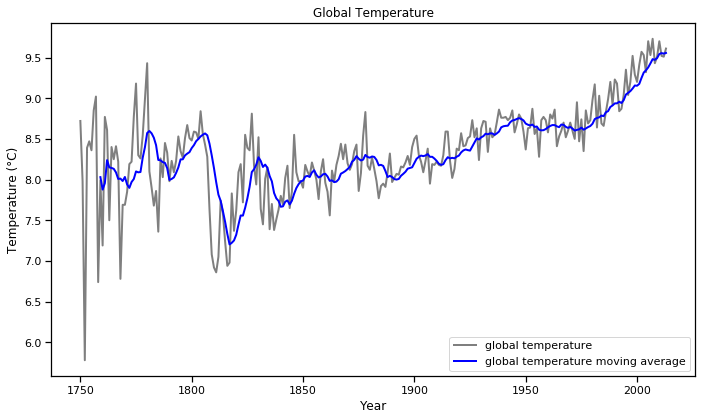

In [26]:
with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,6))

    # plot the global_data and global_data moving averages lineplots
    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data, label = "global temperature", alpha = 0.5,
                 color = "k", lw = 2)
    sns.lineplot(x = "year", y = "moving_avg", data = df_global_data, label = "global temperature moving average", 
                 color = "b", lw = 2)

    # set the title, legend, x & y labels
    ax.set_title("Global Temperature")
    ax.legend(loc='lower right')
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (°C)")

    plt.tight_layout()
    plt.show()

From the global temperatures and the corresponding moving averages, there are some interesting observations. **First, it is clear that there is an uptrend in the global temperatures starting from 1850 to 1950, then a narrow plateau appears around 1950 and 1980, afterwards there is a more rapid global temperature increase from year 1980 until 2013, where the hottest year is 2013 (on the full data set it is 2015), which implys that we are having a global warming issue. Second, there is a strong decrease in global average temperatures between 1800 and 1810, where the average temperature decreases from around 8.5 C to 6.9 C. Third, there are more variations in the global temperatures between 1750 and 1850, compared with the years afterwards, where the temperatures seems to be more "stable", this is possibly due to the development of a more advanced global temperature measuring method over the years.** To verify the change of variations in temperatures, I plotted the moving standard variation for the global temperatures below:

Text(0.5, 1.0, 'Global Temperature Moving Standard Deviation')

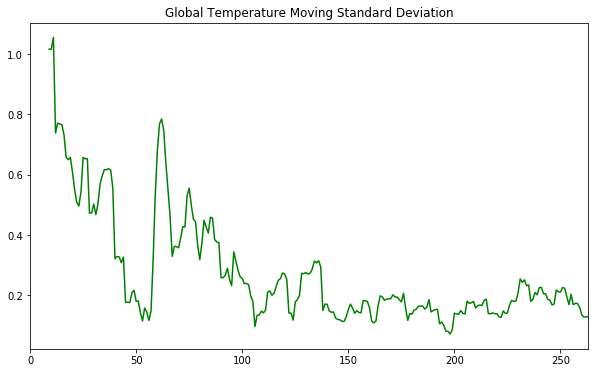

In [27]:
# the moving standard deviaton for the global_data
df_global_data["avg_temp"].rolling(window = avg_const).std().plot(figsize = (10,6), color = "g")
plt.title("Global Temperature Moving Standard Deviation")

**We can see that the standard deviation decreases for the first 50 years, then there is a spike at around year 1810, which corresponds to the global temperature drcrease seen between 1800 and 1810. The standard variation becomes stable after the first 100 years.**

To plot the trend line for the global temperature data, I used **the LinearRegression model from SKlearn**. This trend would help to predict the future global temperatures.

In [28]:
# linear regression on global temperature time series

regression_model = LinearRegression()
            
x = df_global_data[["year"]]
y = df_global_data[["avg_temp"]]

# fit the data
regression_model.fit(x, y)
            
# predict the values with the x data to get the trend line
df_global_data["trend"] = regression_model.predict(x)
print(f"global trend slope: {regression_model.coef_}")

# reset the index
df_global_data.reset_index(inplace = True, drop = True)   
    
# the average temperature from 1750 to 2013 for the global
print(f'global average temperature (1750-2013): {df_global_data["avg_temp"].mean():.2f} °C')
print(f'global max temperature: {df_global_data["avg_temp"].max():.2f} °C')
print(f'global min temperature: {df_global_data["avg_temp"].min():.2f} °C')

global trend slope: [[0.00461111]]
global average temperature (1750-2013): 8.36 °C
global max temperature: 9.73 °C
global min temperature: 5.78 °C


This trend line can be overplotted with the global_data and its moving average

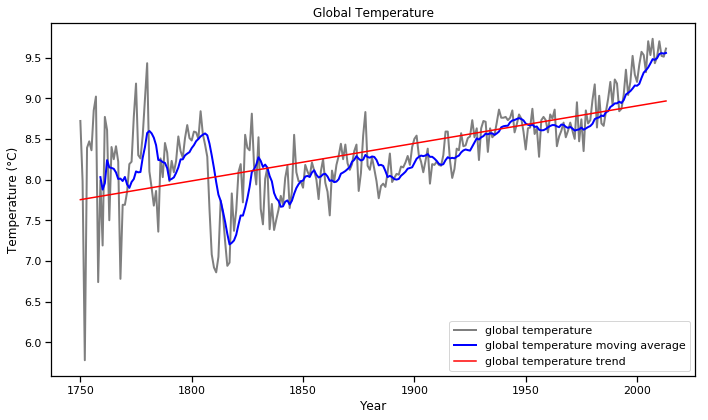

In [29]:
# overplot the global_data and its moving average and its trend line
with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,6))

    sns.lineplot(x = "year", y = "avg_temp", data = df_global_data, label = "global temperature", alpha = 0.5,
                 color = "k", lw = 2)
    sns.lineplot(x = "year", y = "moving_avg", data = df_global_data, label = "global temperature moving average",
                 color = "b", lw = 2)
    sns.lineplot(x = "year", y = "trend", data = df_global_data, label = "global temperature trend", color = "r")
    
    # set the title, legend, x & y labels
    ax.set_title("Global Temperature")
    ax.legend(loc='lower right')
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (°C)")

    plt.tight_layout()
    plt.show()

**There are some additional observations about the global temperature. First, the global temperature trend has a slope of 0.0046, which is a direct indication of global warming, with a global average temperature (1750-2013) of 8.36 °C, a global max temperature of 9.73 °C and a global min temperature of 5.78 °C. Second, for the past 30 years, the global temperature has been increasing more rapidly and "out of control", this is because the actual yearly temperatures between ~1980 and 2013 are all above the trend line, we should take actions immediately to deal with this global warming issue.** 

Next, I will analyze the temperatures of Virginia Beach, I will first overplot the Virginia Beach temperatures and the moving averages. Then plot the moving standard deviations, then overplot the trend line of Virginia Beach temperature. After these three plots, I will discuss the observations of the temperatures in Virginia Beach.

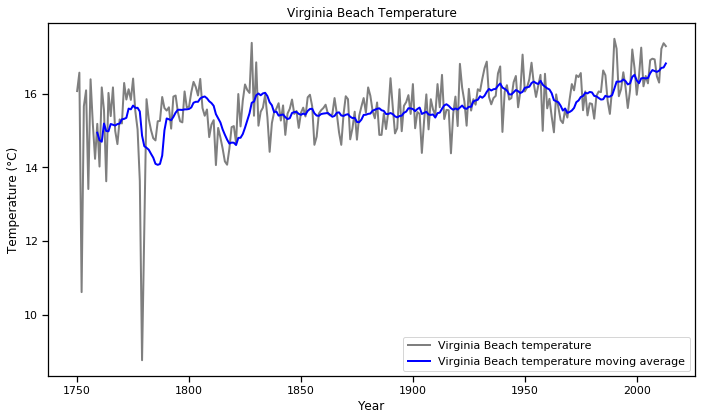

In [30]:
with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,6))

    # plot the vb lineplot and vb moving average lineplot
    sns.lineplot(x = "year", y = "avg_temp", data = df_vb, label = "Virginia Beach temperature", alpha = 0.5,
                 color = "k", lw = 2)
    sns.lineplot(x = "year", y = "moving_avg", data = df_vb, label = "Virginia Beach temperature moving average",
                 color = "b", lw = 2)

    # set the title, legend, x & y labels
    ax.set_title("Virginia Beach Temperature")
    ax.legend(loc='lower right')
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (°C)")

    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Viginia Beach Temperature Moving Standard Deviation')

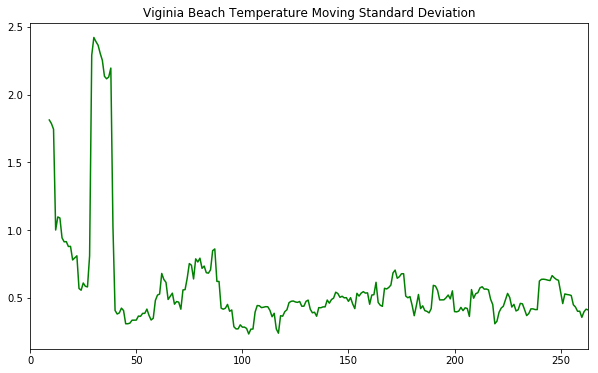

In [31]:
# the moving standard deviaton for virginia beach temperature
df_vb["avg_temp"].rolling(window = avg_const).std().plot(figsize = (10,6), color = "g")
plt.title("Viginia Beach Temperature Moving Standard Deviation")

In [32]:
# linear regression on virgina beach temperature time series

regression_model = LinearRegression()
            
x = df_vb[["year"]]
y = df_vb[["avg_temp"]]

# fit the data
regression_model.fit(x, y)
            
# predict the values with the x data to get the trend line
df_vb["trend"] = regression_model.predict(x)
print(f"virginia beach trend slope: {regression_model.coef_}")

# reset the index
df_vb.reset_index(inplace = True, drop = True)   
    
# the average temperature from 1750 to 2013 for virginia beach
print(f'virginia beach average temperature (1750-2013): {df_vb["avg_temp"].mean():.2f} °C')
print(f'virginia beach max temperature: {df_vb["avg_temp"].max():.2f} °C')
print(f'virginia beach min temperature: {df_vb["avg_temp"].min():.2f} °C')

virginia beach trend slope: [[0.005237]]
virginia beach average temperature (1750-2013): 15.64 °C
virginia beach max temperature: 17.49 °C
virginia beach min temperature: 8.76 °C


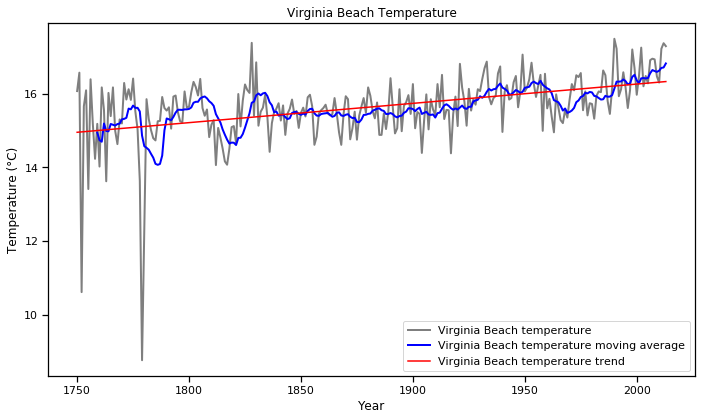

In [33]:
# overplot the virginia beach temperature and its moving average and its trend line
with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,6))

    sns.lineplot(x = "year", y = "avg_temp", data = df_vb, label = "Virginia Beach temperature", alpha = 0.5, 
                 color = "k", lw = 2)
    sns.lineplot(x = "year", y = "moving_avg", data = df_vb, label = "Virginia Beach temperature moving average", 
                 color = "b", lw = 2)
    sns.lineplot(x = "year", y = "trend", data = df_vb, label = "Virginia Beach temperature trend", color = "r")
    
    # set the title, legend, x & y labels
    ax.set_title("Virginia Beach Temperature")
    ax.legend(loc='lower right')
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (°C)")

    plt.tight_layout()
    plt.show()

The observations of the temperatures of Virginia Beach are as follows. **First, there is an overall uptrend in Virginia Beach's temperature, as the trend line has a slope of 0.0052 (slightly large than the global trend slope of 0.0046), this is also clearly seen from both the original data and its moving averages. Second, the average temperature in Virginia Beach in the years investigated (1750-2013) is 15.64 °C, which is 7.28 °C higher than the global average. And Virginia Beach has a max temperature of 17.49 °C and a min temperature of 8.76 °C. Third, there are two obvious negative spikes in the temperature plot, which are around year 1750 and year 1780, respectively. It is also evident in the moving standard deviation plot. we actually have seen this in two previous code cells when we were obtaining the temperatures of year 1779 (8.76 °C) and 1781 (15.85 °C). It appears that the anomaly in the temperature of Virginia Beach comes from year 1779, and is worth more investigation.**

In the next step, I overplotted the global temperature moving averages and global temperature trend line together with the Virginia Beach temperature moving averages and Virginia Beach temperature trend line for cross comparisons.

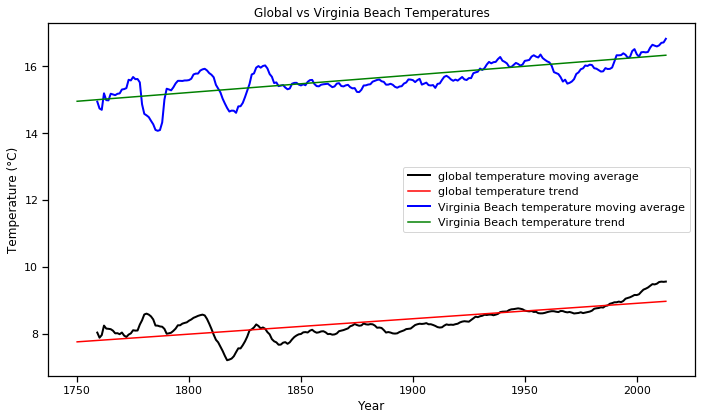

In [34]:
# overplot the global and virginia beach moving averages and their trend lines
with sns.plotting_context("notebook"):
    # create a matplotlib figure
    fig, ax = plt.subplots(figsize = (10,6))

    sns.lineplot(x = "year", y = "moving_avg", data = df_global_data, label = "global temperature moving average",
                 color = "k", lw = 2)
    sns.lineplot(x = "year", y = "trend", data = df_global_data, label = "global temperature trend", color = "r")
    sns.lineplot(x = "year", y = "moving_avg", data = df_vb, label = "Virginia Beach temperature moving average", 
                 color = "b", lw = 2)
    sns.lineplot(x = "year", y = "trend", data = df_vb, label = "Virginia Beach temperature trend", color = "g")
    
    # set the title, legend, x & y labels
    ax.set_title("Global vs Virginia Beach Temperatures")
    ax.legend()
    ax.set_xlabel("Year")
    ax.set_ylabel("Temperature (°C)")

    plt.tight_layout()
    plt.show()

**From the plot above, it is clear that Virginia Beach has an average temperature approximately 7 °C higher than the global from 1750 to 2013. The downtrend in temperature from 1800 to 1810 in the global temperature moving average is also seen in the Virginia Beach data, which is a sign that Virginia Beach is also affected. In the last few decades, both temperatures show a strong uptrend with values above the trend line, indicating the local temperature might be correlated with the global temperature as well.** 

To find how these two temperature datasets are correlated to each other, I calculated the correlation coefficient between them.

In [35]:
# the correlation coefficient between the global and virginia beach average temperatures
df_vb[["avg_temp"]].corrwith(df_global_data["avg_temp"])

avg_temp    0.510818
dtype: float64

**The correlation coefficient being 0.51 means that the global temperature and the temperature of Virginia Beach are moderately correlated.**

# Step 3: Conclusion
Using **SQL, pandas, matplotlib and LinearRegression from SKlearn**, I investigated the global temperature time series from 1750 to 2013, and compared it with the temperatures of Virginia Beach, by using the method of **moving average** and fitting the time series with a **trend line**.

**From the global temperature time series, observations can be drawn as follows:**

- There is an overall uptrend in the global temperature, indicating global warming.
- A much rapid increase in global temperature is seen from year 1980 to 2013, with the hottest year being 2013, we need to take actions immediately to deal with global warming issue. 
- There is a strong decrease in the global temperature between 1800 and 1810, from ~8.5 C to 6.9 C.
- There are more variations in the global temperatures between 1750 and 1850, compared with the years afterwards.
- from year 1750 to year 2013, the global average temperature is 8.36 °C.

**From the Virginia Beach temperature time series, I have the following observations:**

- Similar to the global trend, there is an overall uptrend in Virginia Beach's temperature.
- In the last few decades, the temperature of Virginia Beach also shows a strong uptrend with values above the trend line.
- The average temperature in Virginia Beach in the years investigated (1750-2013) is 15.64 °C, which is 7.28 °C higher than the global average.
- There are two obvious negative spikes in the plot of the temperatures of Virginia beach, one of them is from year 1779, with a average temperature of 8.76 °C much lower than the temperature in 1781 (15.85 °C).

**By cross comparing both temperature, there are some additional observations:**

- Virginia Beach overall has an average temperature approximately 7 °C higher than the global from 1750 to 2013.
- The downtrend in temperature from 1800 to 1810 in the global temperature is also seen in the Virginia Beach data, which is a sign that Virginia Beach is also affected.
- The global temperature and the temperature of Virginia Beach are moderately correlated with a correlation coefficient of 0.51.